### sklearn.linear_model.Ridge
* class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./datasets/housing.csv', header=None, delimiter=r"\s+", names=column_names)

y_target = df['MEDV']
X_data = df.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size =0.3, random_state=156)

In [9]:
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 flods의 개별 Negative MSE scores :', np.round(neg_mse_scores, 3))
print('5 flods의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 flods의 개별 RMSE : {0:.3f} '.format(avg_rmse))

5 flods의 개별 Negative MSE scores : [-39.368 -21.739 -37.434 -26.32  -17.839]
5 flods의 개별 RMSE scores :  [6.274 4.663 6.118 5.13  4.224]
5 flods의 개별 RMSE : 5.282 


In [10]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [11]:
ridge.coef_

array([-0.09899991,  0.07158454, -0.03587402,  1.95096359, -1.97071905,
        3.200516  , -0.0056562 , -1.46784831,  0.32452012, -0.01618401,
       -0.70840332,  0.01143944, -0.61772405])

In [12]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas : 
    ridge = Ridge(alpha = alpha)

    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일때 5 flods의 평균 : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일때 5 flods의 평균 : 5.162 
alpha 0.1 일때 5 flods의 평균 : 5.165 
alpha 1 일때 5 flods의 평균 : 5.209 
alpha 10 일때 5 flods의 평균 : 5.282 
alpha 100 일때 5 flods의 평균 : 5.379 


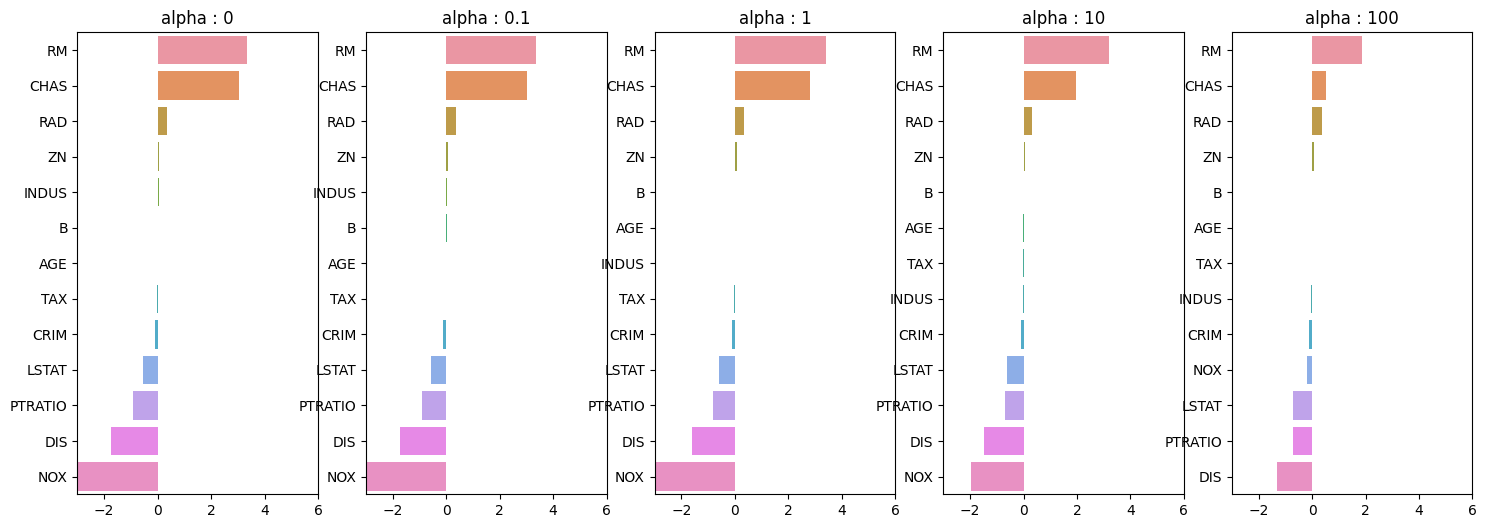

In [17]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas) : 
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    coeff = pd.Series(data = ridge.coef_, index = X_train.columns)
    colname = 'alpha : ' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax = axs[pos])

plt.show()

In [18]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas : 
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))

    print(f'alpha {alpha} 일때 RMSE : {rmse:.3f}')

alpha 0 일때 RMSE : 4.159
alpha 0.1 일때 RMSE : 4.153
alpha 1 일때 RMSE : 4.148
alpha 10 일때 RMSE : 4.207
alpha 100 일때 RMSE : 4.400


### sklearn.linear_model.Lasso
* class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [23]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas : 
    lasso = Lasso(alpha = alpha)

    neg_mse_scores = cross_val_score(lasso, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일때 5 flods의 평균 : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일때 5 flods의 평균 : 5.162 
alpha 0.1 일때 5 flods의 평균 : 5.336 
alpha 1 일때 5 flods의 평균 : 5.618 
alpha 10 일때 5 flods의 평균 : 6.600 
alpha 100 일때 5 flods의 평균 : 8.586 


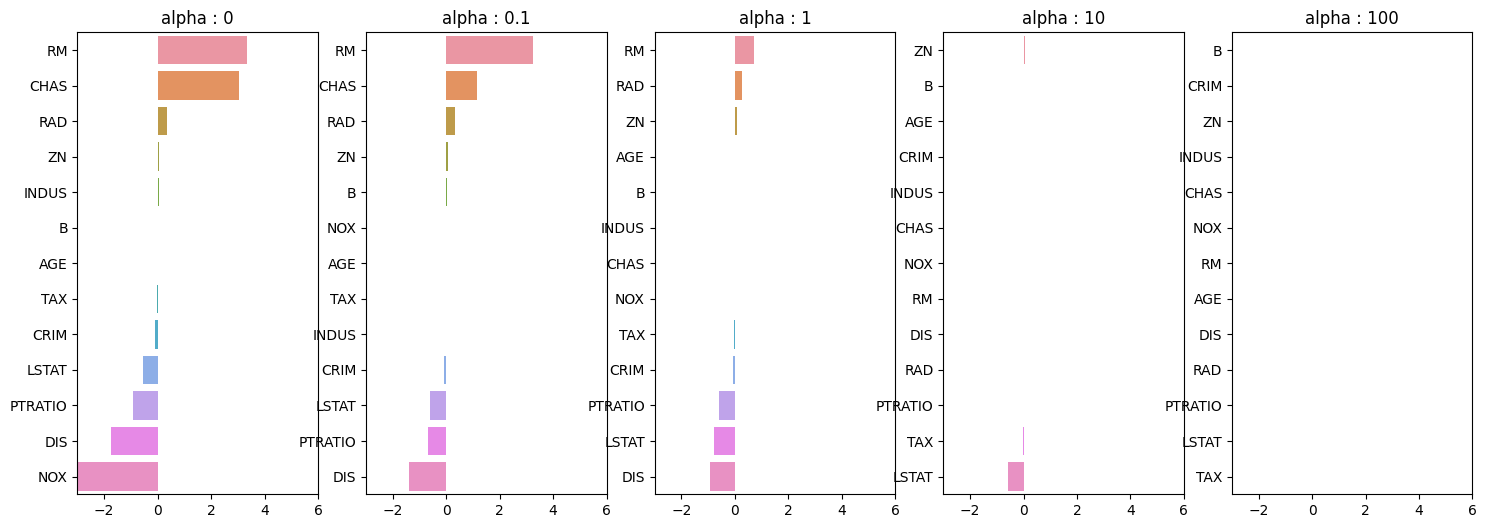

In [25]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas) : 
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    coeff = pd.Series(data = lasso.coef_, index = X_train.columns)
    colname = 'alpha : ' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax = axs[pos])

plt.show()

### sklearn.linear_model.ElasticNet
* class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [36]:
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n=None, verbose=True) : 
    coeff_df = pd.DataFrame()
    if verbose : print('######', model_name, "######")
    for param in params :
        if model_name == 'Ridge' : model = Ridge(alpha = param)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        meg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'alpha : {param}일때 5폴드 세트의 평균 RMSE : {avg_rmse : .3f}')

        model.fit(X_train, y_train)

        coeff = pd.Series(data = model.coef_, index = X_train.columns)
        colname = 'alpha : ' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [37]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n = X_train, y_target_n = y_train)

###### Lasso ######
alpha : 0.07일때 5폴드 세트의 평균 RMSE :  8.586
alpha : 0.1일때 5폴드 세트의 평균 RMSE :  8.586
alpha : 0.5일때 5폴드 세트의 평균 RMSE :  8.586
alpha : 1일때 5폴드 세트의 평균 RMSE :  8.586
alpha : 3일때 5폴드 세트의 평균 RMSE :  8.586
